In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
df = pd.read_csv(r'C:\Users\sujith\Desktop\Technocolabs\problem2\Project-Data-Set-Repository-master\Project-Data-Set-Repository-master\Data set\cleaned_data.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['LIMIT_BAL'].unique()

array([ 20000, 120000,  90000,  50000, 500000, 100000, 140000, 200000,
       260000, 630000,  70000, 250000, 360000, 180000, 130000, 450000,
        60000, 230000, 160000, 280000,  10000,  40000, 210000, 150000,
       380000, 310000, 400000,  80000, 290000, 340000, 300000,  30000,
       240000, 470000, 480000, 350000, 330000, 110000, 420000, 170000,
       370000, 270000, 220000, 320000, 190000, 510000, 460000, 440000,
       410000, 490000, 390000, 580000, 600000, 620000, 610000, 700000,
       670000, 680000, 430000, 550000, 540000, 530000, 710000, 520000,
       750000, 640000, 570000, 590000, 660000, 560000, 720000, 327680,
       740000, 800000, 760000, 690000, 650000, 780000, 730000,  16000],
      dtype=int64)

In [5]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
X = df['LIMIT_BAL'][0:].values.reshape(-1,1)
y = df['default payment next month'][0:].values

In [73]:
X

array([[ 20000],
       [120000],
       [ 90000],
       ...,
       [ 30000],
       [ 80000],
       [ 50000]], dtype=int64)

In [74]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [76]:
my_new_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [77]:
pred_probs = my_new_lr.predict_proba(X_test)

In [78]:
pred_probs

array([[0.9302145 , 0.0697855 ],
       [0.89214931, 0.10785069],
       [0.58438193, 0.41561807],
       ...,
       [0.87084075, 0.12915925],
       [0.6487202 , 0.3512798 ],
       [0.76109265, 0.23890735]])

In [81]:
y_pred = my_new_lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [84]:
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_test, y_pred)

In [85]:
roc_auc

0.5

In [28]:
pred_probs

array([[0.9302145 , 0.0697855 ],
       [0.89214931, 0.10785069],
       [0.58438193, 0.41561807],
       ...,
       [0.87084075, 0.12915925],
       [0.6487202 , 0.3512798 ],
       [0.76109265, 0.23890735]])

In [30]:
pp = np.array(pred_probs)

In [37]:
pp = pp.flatten()

In [86]:
# calculate roc curve
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

_________________________________________________________________________
**Now, plot the ROC curve.**


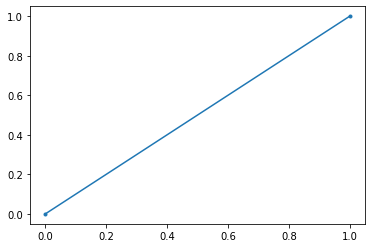

In [87]:
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [89]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [53]:
yp = np.array(y_test)
yp.shape

(8800, 1)

In [47]:
pred_probs.shape

(8800, 2)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


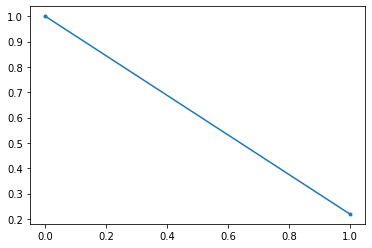

In [91]:
plt.plot(recall, precision, marker='.', label='Logistic')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [1]:
from sklearn import metrics
roc_auc = metrics.roc_auc_score(X_train, X_test)

    How is this different, conceptually and quantitatively, from your earlier calculation?
